<center><h1><strong><font color="green">Study Case 03 - Kelompok H</font></strong></h1></center>

<img alt="" src="images/covers/cover_ui-n-taudata.jpg"/>

1. Aisyah Ghefira (2006572945)
2. Andini Assyahidah (2006571040)
3. Dewita Oktavia Nuur Marwan (2006531195)
4. Kezia Emmanuela (2006572964)
5. Maria Angelica Christabel (2006483593)
6. Nafisya Alya Aurelitha (2006571122)
7. Nurul Qomariah Abdillah (2006463811)

# PreProcessing Data

In [1]:
# Warning install "mlxtend" module first. Jalankan cell ini Hanya jika menggunakan Google Colaboratory:
# Jika menggunakan Jupyter notebook secara lokal (e.g. Anaconda/WinPython) silahkan install lewat terminal (e.g. command prompt)
try:
    import google.colab as gc_
    print("Running the code in Google Colab.", gc_) #IN_COLAB = True
    print("Installing required Module, please wait ... ")
    !pip install mlxtend 
    !pip install pycaret
except:
    print("Running the code locally, make sure to install required modules.")#IN_COLAB = False

Running the code in Google Colab. <module 'google.colab' from '/usr/local/lib/python3.8/dist-packages/google/colab/__init__.py'>
Installing required Module, please wait ... 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.7/147.7 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.7/328.7 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [2]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from itertools import combinations
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from pycaret.arules import *

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
#IMPORT DATA
df =  pd.read_csv ("https://raw.githubusercontent.com/nurulqa/Case-Study-03-Kelompok-H/main/cae_Kasus-AR-MBA-Ganjil-2022.csv")
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,7/1/2022 0:00,Mr. A,1,Roti,Sri Roti,2
1,NaN,NaN,NaN,2,Air Minum,Aquos,1
2,NaN,NaN,NaN,11,Mie Instan,Indomi,2
3,NaN,NaN,NaN,12,Mie Instan,Mi Sedap,1
4,2.0,7/1/2022 0:00,Mr. B,2,Air Minum,Aquos,1
5,NaN,NaN,NaN,6,Snack,Chiki,2
6,NaN,NaN,NaN,3,Roti,Prambanan,1
7,NaN,NaN,NaN,5,Shampoo,Clean,1
8,3.0,7/2/2022 0:00,Mr. C,4,Sabun,Lifboy,1
9,NaN,NaN,NaN,5,Shampoo,Clean,1


In [5]:
#FILL NA
df['Konsumen'].fillna(method = 'ffill', inplace = True)
df['Tanggal'].fillna(method = 'ffill', inplace=True)
df['ID Transaksi'].fillna(method = 'ffill', inplace=True)
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
0,1.0,2022-07-01,Mr. A,1,Roti,Sri Roti,2
1,1.0,2022-07-01,Mr. A,2,Air Minum,Aquos,1
2,1.0,2022-07-01,Mr. A,11,Mie Instan,Indomi,2
3,1.0,2022-07-01,Mr. A,12,Mie Instan,Mi Sedap,1
4,2.0,2022-07-01,Mr. B,2,Air Minum,Aquos,1
5,2.0,2022-07-01,Mr. B,6,Snack,Chiki,2
6,2.0,2022-07-01,Mr. B,3,Roti,Prambanan,1
7,2.0,2022-07-01,Mr. B,5,Shampoo,Clean,1
8,3.0,2022-07-02,Mr. C,4,Sabun,Lifboy,1
9,3.0,2022-07-02,Mr. C,5,Shampoo,Clean,1


In [6]:
# cek missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID Transaksi  56 non-null     float64       
 1   Tanggal       56 non-null     datetime64[ns]
 2   Konsumen      56 non-null     object        
 3   ID Produk     56 non-null     int64         
 4   Nama Produk   56 non-null     object        
 5   Merek         56 non-null     object        
 6   Jumlah        56 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 3.2+ KB


# **DATA WRANGLING dan EDA**

In [7]:
# Filter top scoring
df_top = df[df['Jumlah'] >= max(df['Jumlah'])]
df_top

,ID Transaksi,Tanggal,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
13,4.0,2022-07-02,Mr. B,8,Snack,Citata,3
26,8.0,2022-07-04,Mr. B,11,Mie Instan,Indomi,3


Dapat dilihat, dalam sekali transaksi, produk yang terbanyak dibeli yaitu Snack Citata dan Mie Instan Indomi dengan masing- masing 3 item terjual dibeli oleh Mr.B.

In [8]:
df['Jumlah'].groupby([df['Nama Produk']]).sum()

Nama Produk
Air Minum     16
Mie Instan    15
Rokok          5
Roti          15
Sabun         10
Shampoo        7
Snack         16
Name: Jumlah, dtype: int64

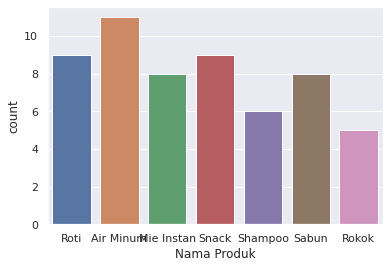

In [9]:
#Frekuensi pembelian produk
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.countplot(x="Nama Produk", data=df)

Dapat dilihat total produk yang paling banyak terjual yaitu Air Minum dengan total 16 item, sedangkan yang paling sedikit terjual yaitu Rokok dengan 5 item terjual.

In [10]:
df.groupby(['Nama Produk', 'Merek'])[['Jumlah']].sum()

Jumlah
Nama Produk Merek            
Air Minum   Aquos           6
            Sprit          10
Mie Instan  Indomi         10
            Mi Sedap        5
Rokok       Malioboro       5
Roti        Prambanan       4
            Sri Roti       11
Sabun       Lifboy          6
            Luks            4
Shampoo     Clean           7
Snack       Chiki          11
            Citata          5

Dari hasil diatas, dapat diketahui produk yang paling banyak terjual yaitu Roti Sri Roti dan Snack Chiki dengan masing- masing 11 item terjual. Produk yang paling sedikit terjual yaitu Roti Prambanan dan Sabun Luks dengan masing- masing 4 item terjual.

In [11]:
pd.crosstab(df.Konsumen, df.Merek)

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
Konsumen,,,,,,,,,,,,
Mr. A,1,1,0,0,1,0,0,0,1,0,1,1
Mr. B,1,2,1,2,1,0,2,0,1,1,2,2
Mr. C,0,0,0,1,0,1,0,1,0,0,0,0
Mr. D,0,0,0,1,1,1,0,0,0,0,0,0
Mr. F,0,0,0,0,0,0,0,1,0,0,0,0
Mr. G,0,0,0,1,1,1,0,0,1,0,0,0
Mr. J,1,0,0,0,0,0,0,0,0,0,0,0
Mr. P,0,0,0,0,0,0,0,1,0,1,0,0
Mr. T,0,1,0,0,0,0,0,0,0,1,1,0


In [12]:
df.groupby(['Konsumen', 'ID Produk'])[['Jumlah']].sum()

Jumlah
Konsumen ID Produk        
Mr. A    1               2
         2               1
         6               1
         10              2
         11              2
         12              1
Mr. B    1               4
         2               1
         3               1
         5               2
         6               3
         7               2
         8               3
         10              4
         11              3
         12              2
Mr. C    4               1
         5               1
         9               1
Mr. D    4               1
         5               1
         11              2
Mr. F    9               1
Mr. G    4               2
         5               1
         11              1
         12              2
Mr. J    2               2
Mr. P    3               2
         9               1
Mr. T    3               1
         6               2
         10              2
Mr. X    1               5
         2               2
         4               2
         6               4
         8               2
         9               1
         10              1
         11              2
Mr. Z    9               1
         10              1
Mr.Y     5               2
         6               1
         7               2

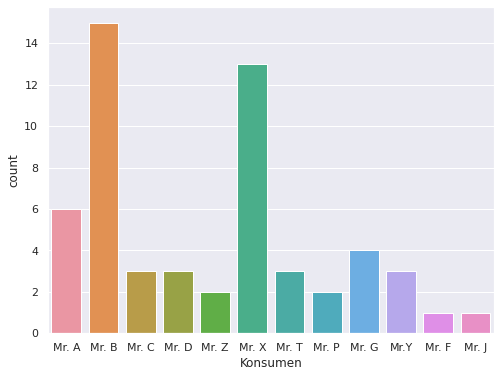

In [13]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="Konsumen",data=df)
#plt.plot(x, y)

Dari hasil diatas, dapat dilihat bahwa pembelian terbanyak dilakukan oleh Mr.B dengan total pembelian 8 produk dan pembelian sedikit dilakukan oleh Mr.D, Mr.P, dan Mr.J dengan masing- masing pembelian 1 produk.

# **MARKET BASKET ANALYSIS**

In [14]:
#Mengganti tipe data
import datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df['Konsumen'] = df['Konsumen'].astype('category')
df['Konsumen'] = df['Konsumen'].astype('category')
df['Nama Produk'] = df['Nama Produk'].astype('category')
df['Merek'] = df['Merek'].astype('category')

In [15]:
#Cek Missing Value
df.isnull().sum().sort_values(ascending=False) 

ID Transaksi    0
Tanggal         0
Konsumen        0
ID Produk       0
Nama Produk     0
Merek           0
Jumlah          0
dtype: int64

VISUALISASI DATA

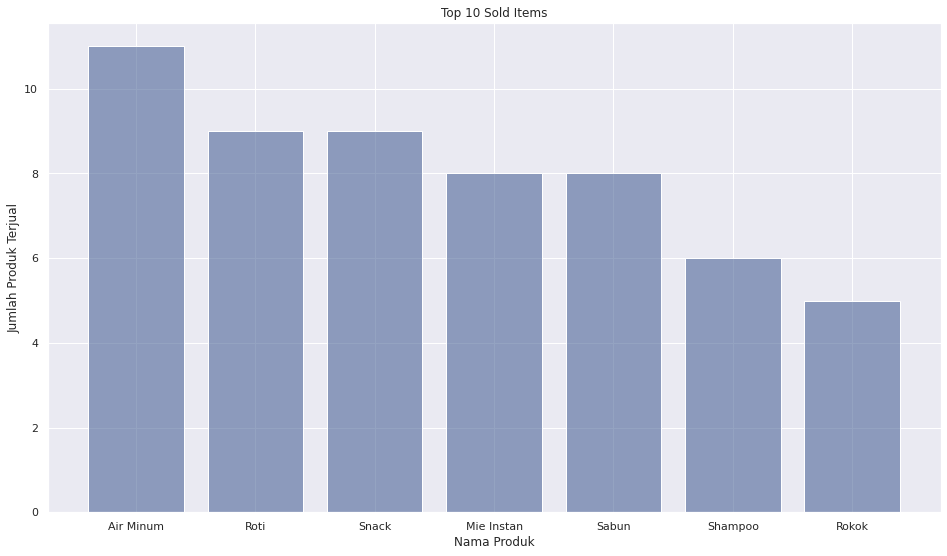

In [16]:
import numpy as np

#TOP 10 PRODUK TERJUAL

#Membuat Distribusi dari Item Terjual
Item_distr = df.groupby(by = "Nama Produk").size().reset_index(name='Jumlah').sort_values(by = 'Jumlah',ascending=False).head(10)

#Mendeklarasikan Variabel
bars = Item_distr["Nama Produk"]
height = Item_distr["Jumlah"]
x_pos = np.arange(len(bars))

#Ukuran Grafik

plt.figure(figsize=(16,9))

# Membuat Visualisasi
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Memberi judul dan label grafik
plt.title("Top 10 Sold Items")
plt.xlabel("Nama Produk")
plt.ylabel("Jumlah Produk Terjual")

# Membuat nama pada sumbu x
plt.xticks(x_pos, bars)

# Memunculkan grafik
plt.show()

Dari grafik di atas, dapat dilihat bahwa produk paling banyak terjual adalah air minum dan produk paling sedikit terjual adalah rokok.

In [17]:
#VISUALISASI JUMLAH PRODUK TERJUAL SETIAP BULAN
#Set data sebagai index untuk visualisasi data

df_date=df.set_index(['Tanggal']) ## Setting date as index for plotting purpose
df_date

,ID Transaksi,Konsumen,ID Produk,Nama Produk,Merek,Jumlah
Tanggal,,,,,,
2022-07-01,1.0,Mr. A,1,Roti,Sri Roti,2
2022-07-01,1.0,Mr. A,2,Air Minum,Aquos,1
2022-07-01,1.0,Mr. A,11,Mie Instan,Indomi,2
2022-07-01,1.0,Mr. A,12,Mie Instan,Mi Sedap,1
2022-07-01,2.0,Mr. B,2,Air Minum,Aquos,1
2022-07-01,2.0,Mr. B,6,Snack,Chiki,2
2022-07-01,2.0,Mr. B,3,Roti,Prambanan,1
2022-07-01,2.0,Mr. B,5,Shampoo,Clean,1
2022-07-02,3.0,Mr. C,4,Sabun,Lifboy,1


[Text(0, 0.5, 'Jumlah Produk Terjual'), Text(0.5, 0, 'Tanggal')]

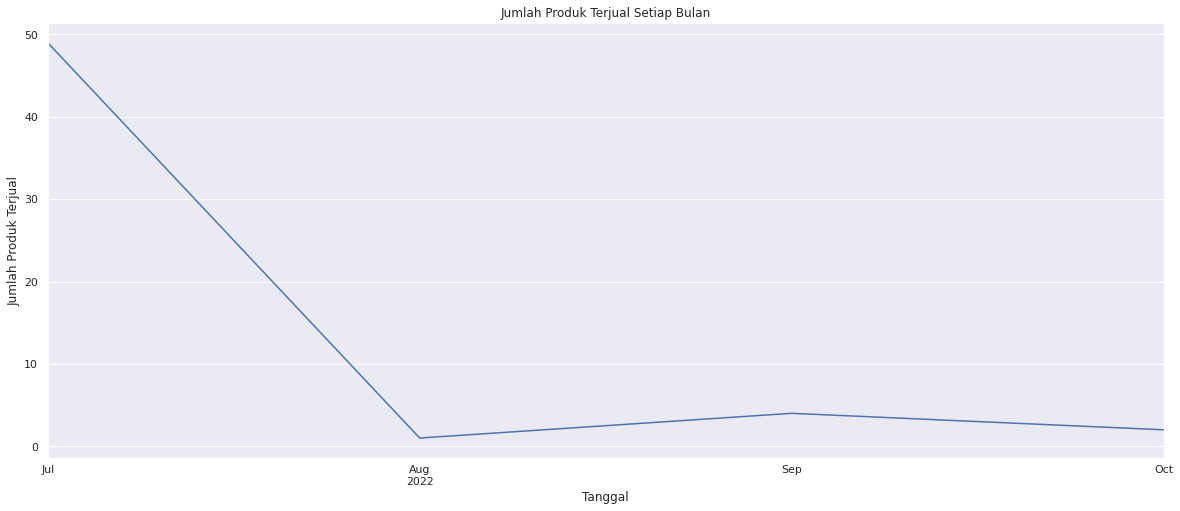

In [18]:
#VISUALISASI JUMLAH PRODUK TERJUAL SETIAP BULAN

df_date.resample("M")['Nama Produk'].count().plot(figsize = (20,8), grid = True, title = "Jumlah Produk Terjual Setiap Bulan").set(xlabel = "Tanggal", ylabel = "Jumlah Produk Terjual")

Dapat dilihat bahwa jumlah produk yang terjual menurun drastis dari Juli 2022 hingga Agustus 2020, lalu meningkat sedikit pada September 2022, dan menurun kembali pada Oktober 2022.

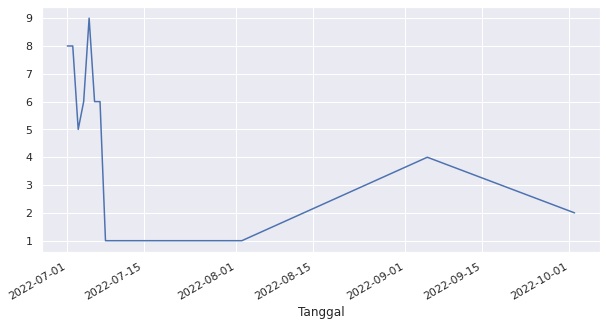

In [19]:
#GRAFIK PEMBELIAN BERDASARKAN WAKTU

plt.figure(figsize=(10,5))
df.groupby('Tanggal')['ID Transaksi'].count().plot()

Untuk lebih detailnya, dapat dilihat pembelian menurun drastis hingga selang waktu 1 Juli 2022 - 15 Juli 2022, lalu konstan hingga 1 Agustus 2022, lalu naik hingga selang waktu 1 September 2022 - 15 September 2022, dan menurun kembali hingga 1 Oktober 2022.

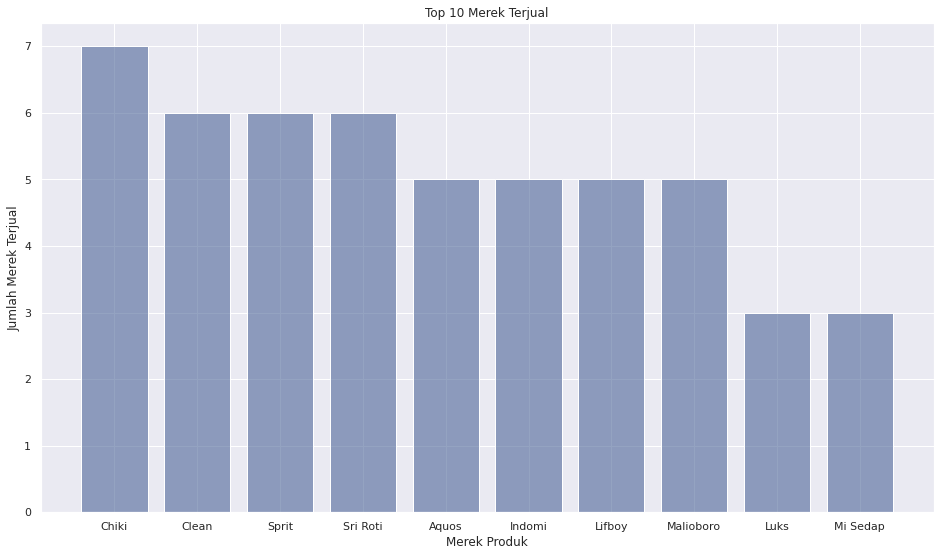

In [20]:
#TOP 10 MEREK TERJUAL

# Membuat distribusi dari merek terjual
Item_distr1 = df.groupby(by = "Merek").size().reset_index(name='Jumlah').sort_values(by = 'Jumlah',ascending=False).head(10)

# Mendeklarasikan variabel
bars = Item_distr1["Merek"]
height = Item_distr1["Jumlah"]
x_pos = np.arange(len(bars))

# Ukuran Grafik
plt.figure(figsize=(16,9))

# Membuat Bar
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

# Menambahkan label
plt.title("Top 10 Merek Terjual")
plt.xlabel("Merek Produk")
plt.ylabel("Jumlah Merek Terjual")

# Membuat nama pada sumbu x
plt.xticks(x_pos, bars)

# Memunculkan grafik
plt.show()

Dapat dilihat bahwa merek paling banyak terjual adalah Chiki dan produk paling sedikit terjual adalah Mie Sedap.

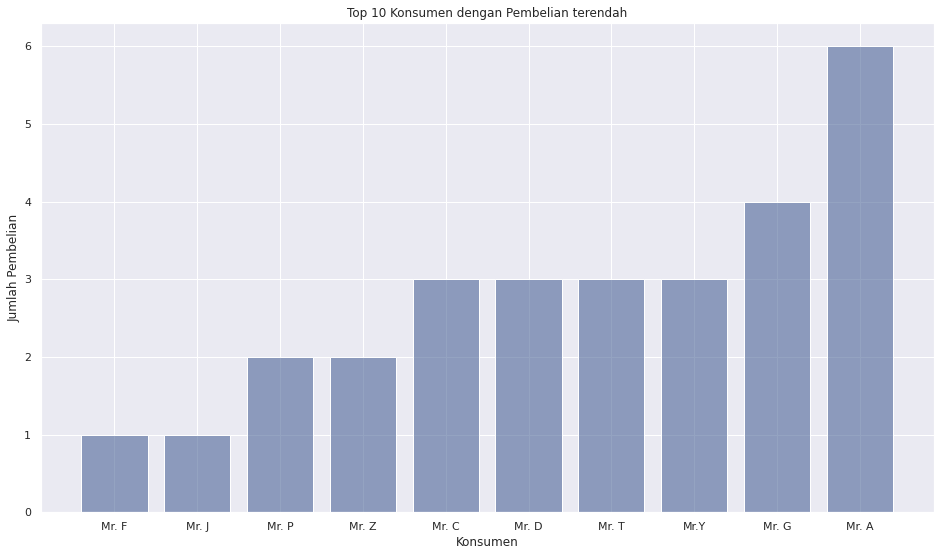

In [21]:
#TOP 10 KONSUMEN DENGAN PEMBELIAN TERENDAH

#Membuat distribusi konsumen terhadap jumlah pembelian produk
Item_distr2 = df.groupby(by = "Konsumen").size().reset_index(name='Jumlah').sort_values(by = 'Jumlah',ascending=True).head(10)

#Mendeklarasikan Variabel
bars = Item_distr2["Konsumen"]
height = Item_distr2["Jumlah"]
x_pos = np.arange(len(bars))

#Ukuran Grafik
plt.figure(figsize=(16,9))

#Membuat Grafik
plt.bar(x_pos, height, color=(0.3, 0.4, 0.6, 0.6))

#Menambahkan label Grafik
plt.title("Top 10 Konsumen dengan Pembelian terendah")
plt.xlabel("Konsumen")
plt.ylabel("Jumlah Pembelian")

#Membuat nama pada sumbu x
plt.xticks(x_pos, bars)

#Memunculkan Grafik
plt.show()

Dari grafik terlihat konsumen dengan jumlah pembelian paling tinggi dan rendah di Alfaindo cabang UI Depok bahwa Mr. A yang memiliki frekuensi belanja paling banyak dan Mr.F dan Mr. J yang memiliki frekuensi belanja paling sedikit.

In [22]:
basket = (df.groupby(['ID Transaksi', 'Nama Produk'])['Jumlah'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('ID Transaksi'))
basket.head()

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1.0,1,2,0,1,0,0,0
2.0,1,0,0,1,0,1,1
3.0,0,0,1,0,1,1,0
4.0,1,1,0,1,1,0,1
5.0,1,0,0,0,0,0,1


In [23]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head(5)

Nama Produk,Air Minum,Mie Instan,Rokok,Roti,Sabun,Shampoo,Snack
ID Transaksi,,,,,,,
1.0,1,1,0,1,0,0,0
2.0,1,0,0,1,0,1,1
3.0,0,0,1,0,1,1,0
4.0,1,1,0,1,1,0,1
5.0,1,0,0,0,0,0,1


In [24]:
basket_sets.columns

Index(['Air Minum', 'Mie Instan', 'Rokok', 'Roti', 'Sabun', 'Shampoo',
       'Snack'],
      dtype='object', name='Nama Produk')

In [25]:
basket_sets.index

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
              12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0],
             dtype='float64', name='ID Transaksi')

In [26]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets1 = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets1.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets1

,support,itemsets
0,0.611111,(Air Minum)
3,0.500000,(Roti)
6,0.500000,(Snack)
4,0.444444,(Sabun)
9,0.444444,"(Roti, Air Minum)"
11,0.388889,"(Snack, Air Minum)"
27,0.333333,"(Roti, Snack, Air Minum)"
5,0.333333,(Shampoo)
1,0.333333,(Mie Instan)
19,0.333333,"(Roti, Snack)"


In [27]:
rules = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,"(Mie Instan, Snack, Air Minum)","(Roti, Sabun)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
152,"(Mie Instan, Roti, Snack)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.000000,6.0,0.092593,inf
169,"(Sabun, Air Minum)","(Mie Instan, Roti, Snack)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
162,"(Roti, Sabun)","(Mie Instan, Snack, Air Minum)",0.166667,0.111111,0.111111,0.666667,6.0,0.092593,2.666667
167,"(Mie Instan, Air Minum)","(Roti, Sabun, Snack)",0.166667,0.166667,0.111111,0.666667,4.0,0.083333,2.500000


In [28]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Roti),(Air Minum),0.500000,0.611111,0.444444,0.888889,1.454545,0.138889,3.500000
1,(Air Minum),(Roti),0.611111,0.500000,0.444444,0.727273,1.454545,0.138889,1.833333
2,(Snack),(Air Minum),0.500000,0.611111,0.388889,0.777778,1.272727,0.083333,1.750000
3,(Air Minum),(Snack),0.611111,0.500000,0.388889,0.636364,1.272727,0.083333,1.375000
4,"(Roti, Snack)",(Air Minum),0.333333,0.611111,0.333333,1.000000,1.636364,0.129630,inf


In [29]:
# Filtering
rules[ (rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
159,"(Mie Instan, Snack, Air Minum)","(Roti, Sabun)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf
152,"(Mie Instan, Roti, Snack)","(Sabun, Air Minum)",0.111111,0.166667,0.111111,1.0,6.0,0.092593,inf


Dapat dilihat bahwa kecendrungan yang paling sering terjadi adalah:
1. Bila seseorang membeli Mie Instan, Roti, dan Snack maka mereka akan cenderung membeli Sabun dan Air Minum
2. Bila seseorang membeli Air Minum, Mie Instan, dan Snack maka mereka akan cenderung membeli Sabun dan Roti

In [30]:
basket1 = (df.groupby(['ID Transaksi', 'Merek'])['Jumlah'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('ID Transaksi'))
basket1.head()

Merek,Aquos,Chiki,Citata,Clean,Indomi,Lifboy,Luks,Malioboro,Mi Sedap,Prambanan,Sprit,Sri Roti
ID Transaksi,,,,,,,,,,,,
1.0,1,0,0,0,1,0,0,0,1,0,0,1
2.0,1,1,0,1,0,0,0,0,0,1,0,0
3.0,0,0,0,1,0,1,0,1,0,0,0,0
4.0,0,0,1,0,0,0,1,0,1,0,1,1
5.0,0,1,0,0,0,0,0,0,0,0,1,0


In [31]:
frequent_itemsets1 = apriori(basket1, min_support=0.1, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.277778,(Aquos)
1,0.388889,(Chiki)
2,0.111111,(Citata)
3,0.333333,(Clean)
4,0.277778,(Indomi)
5,0.277778,(Lifboy)
6,0.166667,(Luks)
7,0.277778,(Malioboro)
8,0.166667,(Mi Sedap)
9,0.166667,(Prambanan)


In [32]:
rules2 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)

In [33]:
result2 = rules2[(rules1['lift'] >= 1) & 
               (rules1['confidence'] >= 0.8)]

apr_result1 = result2.sort_values(by='confidence', ascending=False)
apr_result1.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
60,"(Aquos, Lifboy)",(Sri Roti),0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
90,"(Aquos, Chiki, Lifboy)",(Sri Roti),0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
18,(Citata),(Sprit),0.111111,0.333333,0.111111,1.000000,3.000000,0.074074,inf
74,"(Lifboy, Sri Roti)",(Chiki),0.111111,0.388889,0.111111,1.000000,2.571429,0.067901,inf
50,"(Chiki, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf
56,"(Indomi, Sri Roti)",(Aquos),0.111111,0.277778,0.111111,1.000000,3.600000,0.080247,inf
16,(Prambanan),(Chiki),0.166667,0.388889,0.111111,0.666667,1.714286,0.046296,1.833333
27,(Luks),(Clean),0.166667,0.333333,0.111111,0.666667,2.000000,0.055556,2.000000
38,(Mi Sedap),(Sri Roti),0.166667,0.333333,0.111111,0.666667,2.000000,0.055556,2.000000
61,"(Aquos, Sri Roti)",(Lifboy),0.166667,0.277778,0.111111,0.666667,2.400000,0.064815,2.166667


1. Kolom Antecedent Support menyatakan probabilitas konsumen hanya membeli produk antecedents saja. Misal, probabilitas konsumen hanya membeli Roti adalah 50%.
2. Kolom Consequent Support menyatakan probabilitas konsumen hanya membeli produk consequents saja. Misal, probabilitas konsumen hanya membeli Air Minum adalah 61,11%.
3. Kolom Support menyatakan probabilitas konsumen membeli produk antecedents dan consequents. Misal, probabilitas konsumen membeli Roti dan Air Minum adalah 44,44%
4. Kolom Confidence menyatakan ukuran seberapa sering aturan (1), (2), dan (3) terbukti benar.
5. Kolom Lift menyatakan ukuran seberapa sering produk antecedents dan consequents dibeli secara bersamaan dibandingkan jika dibeli secara tidak bersmaaan.

In [34]:
apr_result1['consequents'].value_counts()

(Sri Roti)                  5
(Lifboy)                    5
(Chiki)                     3
(Aquos)                     2
(Clean)                     2
(Sprit)                     1
(Clean, Indomi)             1
(Chiki, Lifboy)             1
(Aquos, Chiki, Sri Roti)    1
(Citata)                    1
(Lifboy, Sri Roti)          1
Name: consequents, dtype: int64

Data di atas merupakan data merek produk dimana konsumen akan membeli merek produk tersebut apabila ia membeli merek produk tertentu. Dapat dilihat bahwa merek produk yang paling banyak dibeli adalah Aquos dan merek produk yang paling sedikit dibeli adalah Sri Roti, Sri Roti dan Sprit, Luks, Clean, Indomi dan Sri Roti, Sri Roti dan Lifboy, Malioboro, dan Mi Sedap.

# **Rekomendasi dan Kesimpulan**
-	Disarankan kepada data engineering untuk lain kali tidak menyimpan data di excel melainkan menyimpannya di csv. Hal ini dikarenakan mempermudah pengerjaan data analyst dalam memproses data serta untuk mengantisipasi scale up business. Hal ini penting dikarenakan excel memiliki kelemahan fatal yaitu memiliki jumlah baris yang terbatas sehingga jika tetap menggunakan excel saat member loyalty programnya semakin banyak maka terdapat kemungkinan beberapa data pelanggan tersebut dapat terhapus.
-	Direkomendasikan kepada perusahaan untuk menambah stok dan variasi produk yang terjual lebih banyak yaitu Air minum dan roti agar penjualan terus meningkat dikemudian hari. 
-	Direkomendasikan kepada perusahaan untuk menjual rokok dengan merek yang lain agar lebih menarik pembeli dikarenakan rokok merupakan produk yang paling sedikit terjual.
-	Direkomendasikan kepada perusahaan untuk memberikan promo pada produk rokok agar penjualan produk rokok meningkat dikarenakan penjualan produk rokok lebih sedikit dibandingkan dengan produk lain.
-	Direkomendasikan kepada perusahaan untuk memberikan reward kepada pelanggan yang paling banyak membeli produk agar pelanggan tersebut dan pelanggan lainnya termotivasi untuk membeli produk lebih banyak sehingga bisa mendapatkan reward yang diberikan oleh perusahaan.
-	Direkomendasikan kepada perusahaan untuk memvariasikan produk yang dijual agar pembeli memiliki banyak pilihan dalam membeli produk di perusahaan tersebut.
